# EDA & Data Preprocessing on Google App Store Rating Dataset

# 1. Import required libraries and read the dataset.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv('Apps_data+(1).csv')

In [42]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [43]:
## few samples

df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3183,Hopper - Watch & Book Flights,TRAVEL_AND_LOCAL,4.4,52028,Varies with device,"5,000,000+",Free,0,Everyone,Travel & Local,"June 29, 2018",Varies with device,5.0 and up
1802,Partymasters - Fun Idle Game,GAME,4.6,541144,63M,"10,000,000+",Free,0,Teen,Arcade,"July 12, 2018",1.2.5,5.0 and up
10357,Ríos de Fe,LIFESTYLE,5.0,141,15M,"1,000+",Free,0,Everyone,Lifestyle,"March 24, 2018",1.8,4.1 and up
10462,Wi-Fi Master,TOOLS,4.5,3673,5.8M,"500,000+",Free,0,Everyone,Tools,"July 24, 2018",1.2.1,4.1 and up
5165,Ferguson AH,MEDICAL,NaN,0,29M,100+,Free,0,Everyone,Medical,"July 17, 2017",300000.0.86,4.0.3 and up


In [44]:
## shape of the DataFrame

df.shape

(10841, 13)

In [45]:
## info of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [46]:
## summary statistics of the Dataset..

df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [47]:
df.describe(include='object')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [48]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Check if there are any duplicate records in the dataset? if any drop them.

In [49]:
df.duplicated().sum()

483

In [50]:
df1=df[df.duplicated()==False]
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [51]:
df1['Category'].unique()       ## here 1.9 nulla entries and drop


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [85]:
df2=df1[df1['Category']!='1.9']
df2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## 6. Check if there are missing values present in the column Rating, If any? drop them and and create a newcolumn as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [69]:
df2[['Rating']].isnull().sum()

Rating    1465
dtype: int64

In [70]:
df3=df2.dropna(subset=['Rating'])
df3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [71]:
def Rating_Category(a):
    if a>3.5:
        return 'High'
    else:
        return 'Low'
        
    

In [72]:
df3['Rating_Category']=df3['Rating'].map(Rating_Category)
df3['Rating_Category']

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_Category, Length: 8892, dtype: object

## 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


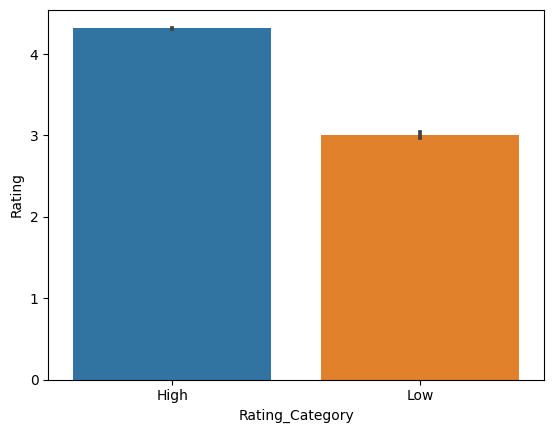

In [86]:
sns.barplot(x=df3['Rating_Category'],y=df3['Rating']);

## 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column andhandle the outliers using a transformation approach.(Hint: Use log transformation)


In [74]:
df3['Reviews']=pd.to_numeric(df3['Reviews'])
df3['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10834         7
10836        38
10837         4
10839       114
10840    398307
Name: Reviews, Length: 8892, dtype: int64

<AxesSubplot: xlabel='Reviews'>

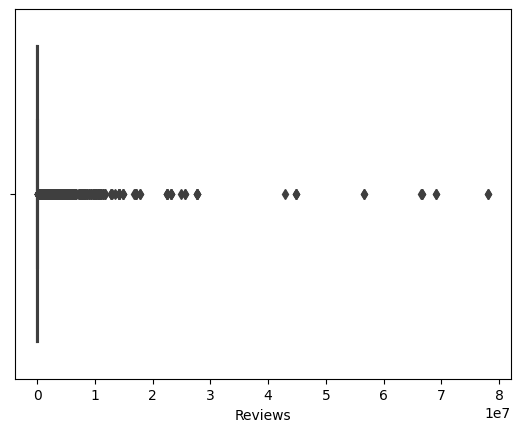

In [75]:
sns.boxplot(x=df3['Reviews'])

In [87]:
log_Tr=FunctionTransformer(np.log1p)
log_Tr

FunctionTransformer(func=<ufunc 'log1p'>)

In [78]:
df3['Reviews']=pd.DataFrame(log_Tr.fit_transform(df3['Reviews']))

<AxesSubplot: xlabel='Reviews'>

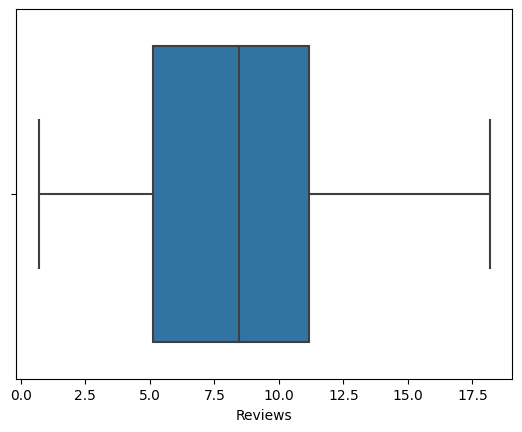

In [79]:
sns.boxplot(x=df3['Reviews'])

## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column intosuitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries wheresize='Varies with device')

In [88]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [90]:
df4 =df3[df3['Size']!='Varies with device']

In [91]:
df4['Size']=df4['Size'].replace({"k":"*1e3", "M":"*1e6"}, regex=True,).map(pd.eval).astype(int)
df4['Size']


0        19000000
1        14000000
2         8700000
3        25000000
4         2800000
           ...   
10833      619000
10834     2600000
10836    53000000
10837     3600000
10840    19000000
Name: Size, Length: 7424, dtype: int32

## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [92]:
df4['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [93]:
df4['Installs']=df4['Installs'].str.replace(',','').str.replace('+','').astype(int)

In [94]:
df4.dtypes    ## Here installs type is converted..

App                 object
Category            object
Rating             float64
Reviews            float64
Size                 int32
Installs             int32
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Rating_Category     object
dtype: object

## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [95]:
df4['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [96]:
df4['Price']=df4['Price'].str.replace('$','').astype(float)

## 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since wecreated a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated','Current Ver','Android Ver' columns since which are redundant for our analysis)

In [97]:
df4.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_Category'],
      dtype='object')

In [99]:
df5=df4.drop(df4[['App','Rating','Genres','Last Updated','Current Ver','Android Ver']],axis=1)

## 13. Encode the categorical columns.


In [100]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [101]:
def Categorical_to_numeric(df):
    list_cols=list(df.select_dtypes(include=['object']).columns)
    for col in list_cols:
        df[col]=lc.fit_transform(list(df[col]))

In [102]:
Categorical_to_numeric(df5)

In [103]:
df5.dtypes

Category             int64
Reviews            float64
Size                 int32
Installs             int32
Type                 int64
Price              float64
Content Rating       int64
Rating_Category      int64
dtype: object

## 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [105]:

x=df5.drop('Rating_Category',axis=1)
y=df5[['Rating_Category']]

## 15. Split the dataset into train and test.

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=555)

In [109]:
x_train,x_test,y_train,y_test

(       Category    Reviews      Size  Installs  Type  Price  Content Rating
 7924         12   8.364275  24000000     50000     0    0.0               1
 10771        25   2.890372   2400000      1000     0    0.0               1
 10755        19   5.814131    676000     10000     0    0.0               1
 5543         26   9.915811  47000000   5000000     0    0.0               1
 153           3  11.412763   5900000   5000000     0    0.0               1
 ...         ...        ...       ...       ...   ...    ...             ...
 4198          6   9.644717   2200000   1000000     0    0.0               1
 1719         14  10.999680   7800000   5000000     0    0.0               1
 10408        14  12.677123  27000000  50000000     0    0.0               4
 7147         27   1.791759   1800000         5     0    0.0               1
 9561         14  13.174189  49000000  10000000     0    0.0               2
 
 [5568 rows x 7 columns],
        Category    Reviews      Size  Installs 

# 16. Standardize the data, so that the values are within a particular range.

In [110]:
z=(df5-df5.mean())/df5.std()
z

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,-2.037529,-0.694300,-0.159917,-0.168752,-0.28201,-0.063054,-0.463189,-0.353556
1,-2.037529,-0.206373,-0.373275,-0.158170,-0.28201,-0.063054,-0.463189,-0.353556
2,-2.037529,1.014569,-0.599434,-0.060986,-0.28201,-0.063054,-0.463189,-0.353556
3,-2.037529,1.259031,0.096113,0.910850,-0.28201,-0.063054,2.517496,-0.353556
4,-2.037529,-0.206373,-0.851197,-0.166808,-0.28201,-0.063054,-0.463189,-0.353556
...,...,...,...,...,...,...,...,...
10833,-1.668977,-1.038145,-0.944264,-0.168947,-0.28201,-0.063054,-0.463189,-0.353556
10834,-0.686171,-1.506329,-0.859731,-0.168957,-0.28201,-0.063054,-0.463189,-0.353556
10836,-0.686171,-1.076934,1.290917,-0.168860,-0.28201,-0.063054,-0.463189,-0.353556
10837,-0.686171,-1.633729,-0.817060,-0.168966,-0.28201,-0.063054,-0.463189,-0.353556
